# GRAPHS

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def parse_md_table(md_table: str) -> pd.DataFrame:
    rows = md_table.strip().split('\n')
    header = [col.strip() for col in rows[0].split('|') if col.strip()]

    data = []
    for row in rows[2:]:
        cols = [col.strip() for col in row.split('|') if col.strip()]
        if len(cols) == len(header):
            data.append(cols)

    return pd.DataFrame(data, columns=header)

In [ ]:
TEST_PUZZLE_0_RESULTS = parse_md_table(
    """
| Name                 |   Path Length |   Nodes Gen. |   Nodes Tested |   Nodes Discarded | Distinct States                 |   Time Taken |
|----------------------|---------------|--------------|----------------|-------------------|---------------------------------|--------------|
| BF                   |             3 |          200 |             50 |                 0 | not recorded (loop_check=False) |    0.0434582 |
| BF_LC                |             3 |           71 |             19 |                45 | 26                              |    0.0422883 |
| BF_LC_HEU1           |             4 |           16 |              5 |                 4 | 12                              |    0.0397968 |
| BF_LC_COS1           |             3 |           71 |             19 |                45 | 26                              |    0.0397352 |
| BF_LC_HEU1+COS1      |             3 |           20 |              6 |                 6 | 14                              |    0.0383438 |
| BF_LC_HEU1+COS1_RAND |             3 |           20 |              6 |                 6 | 14                              |    0.0383865 |
| BF_LC_HEU2           |             4 |           16 |              5 |                 4 | 12                              |    0.0962039 |
| BF_LC_COS2           |             3 |           71 |             19 |                45 | 26                              |    0.0423396 |
| BF_LC_HEU2+COS1      |             3 |           20 |              6 |                 6 | 14                              |    0.0360584 |
| BF_LC_HEU2+COS1_RAND |             3 |           20 |              6 |                 6 | 14                              |    0.0395646 |
| DF                   |               |       100001 |          25001 |                 0 | not recorded (loop_check=False) |   98.6465    |
| DF_LC                |            16 |           65 |             18 |                28 | 37                              |    0.16731   |
| DF_LC_HEU1           |             3 |           13 |              4 |                 2 | 11                              |    0.0590785 |
| DF_LC_COS1           |             3 |           44 |             12 |                24 | 20                              |    0.0597495 |
| DF_LC_HEU1+COS1      |             3 |           13 |              4 |                 2 | 11                              |    0.0548075 |
| DF_LC_HEU1+COS1_RAND |             3 |           20 |              6 |                 6 | 14                              |    0.0559953 |
| DF_LC_HEU2           |             3 |           13 |              4 |                 2 | 11                              |    0.0520596 |
| DF_LC_COS2           |             3 |           44 |             12 |                24 | 20                              |  104.467     |
| DF_LC_HEU2+COS1      |             3 |           13 |              4 |                 2 | 11                              |    0.0357001 |
| DF_LC_HEU2+COS1_RAND |             3 |           13 |              4 |                 2 | 11                              |    0.0288598 |
    """
)

In [37]:
TEST_PUZZLE_1_RESULTS = parse_md_table(
    """
| Name                 | Term. Cond.         |   Path Length |   Nodes Gen. |   Nodes Tested |   Nodes Discarded | Distinct States                 |   Time Taken |
|----------------------|---------------------|---------------|--------------|----------------|-------------------|---------------------------------|--------------|
| BF                   | NODE_LIMIT_EXCEEDED |               |       100001 |          22287 |                 0 | not recorded (loop_check=False) |     3.13848  |
| BF_LC                | GOAL_STATE_FOUND    |            15 |        18459 |           4698 |             12738 | 5721                            |     0.46745  |
| BF_LC_HEU1           | GOAL_STATE_FOUND    |            15 |        28068 |           7874 |             19164 | 8904                            |     0.80878  |
| BF_LC_HEU1+COS1      | GOAL_STATE_FOUND    |            15 |        23580 |           6136 |             16292 | 7288                            |     0.650537 |
| BF_LC_HEU2           | GOAL_STATE_FOUND    |            15 |        28068 |           7874 |             19164 | 8904                            |     0.83613  |
| BF_LC_HEU2+COS1      | GOAL_STATE_FOUND    |            15 |        23580 |           6136 |             16292 | 7288                            |     0.713448 |
| BF_LC_HEU2+COS1_RAND | GOAL_STATE_FOUND    |            15 |        23623 |           6146 |             16326 | 7297                            |     0.710553 |
| DF                   | NODE_LIMIT_EXCEEDED |               |       100001 |          18184 |                 0 | not recorded (loop_check=False) |    85.1267   |
| DF_LC                | GOAL_STATE_FOUND    |           649 |         2792 |            658 |              1011 | 1781                            |     0.174809 |
| DF_LC_HEU1           | GOAL_STATE_FOUND    |           649 |         2792 |            658 |              1011 | 1781                            |     0.117539 |
| DF_LC_HEU1+COS1      | GOAL_STATE_FOUND    |            15 |        18092 |           4599 |             12463 | 5629                            |     0.48613  |
| DF_LC_HEU1+COS1_RAND | GOAL_STATE_FOUND    |            15 |        18359 |           4675 |             12633 | 5726                            |     0.506356 |
| DF_LC_HEU2           | GOAL_STATE_FOUND    |           113 |        31142 |           8618 |             21441 | 9701                            |     0.919454 |
| DF_LC_HEU2+COS1      | GOAL_STATE_FOUND    |            15 |        24276 |           6347 |             16581 | 7695                            |     0.682666 |
| DF_LC_HEU2+COS1_RAND | GOAL_STATE_FOUND    |            15 |        24278 |           6348 |             16583 | 7695                            |     0.695239 |
    """
)

In [38]:
TEST_PUZZLE_2_RESULTS = parse_md_table(
    """
| Name                 | Term. Cond.         |   Path Length |   Nodes Gen. |   Nodes Tested |   Nodes Discarded | Distinct States                 |   Time Taken |
|----------------------|---------------------|---------------|--------------|----------------|-------------------|---------------------------------|--------------|
| BF                   | NODE_LIMIT_EXCEEDED |               |       100001 |          23773 |                 0 | not recorded (loop_check=False) |     3.44794  |
| BF_LC                | GOAL_STATE_FOUND    |            32 |        55359 |          16243 |             38894 | 16465                           |     1.69077  |
| BF_LC_HEU1           | GOAL_STATE_FOUND    |            51 |        68693 |          20249 |             47740 | 20953                           |     2.35538  |
| BF_LC_COS1           | GOAL_STATE_FOUND    |            32 |        55359 |          16243 |             38894 | 16465                           |     1.76687  |
| BF_LC_HEU1+COS1      | GOAL_STATE_FOUND    |            32 |        55822 |          16387 |             39157 | 16665                           |     1.85432  |
| BF_LC_HEU1+COS1_RAND | GOAL_STATE_FOUND    |            32 |        55822 |          16387 |             39157 | 16665                           |     2.31776  |
| BF_LC_HEU2           | GOAL_STATE_FOUND    |            51 |        68693 |          20249 |             47740 | 20953                           |     2.27197  |
| BF_LC_HEU2+COS1      | GOAL_STATE_FOUND    |            32 |        55822 |          16387 |             39157 | 16665                           |     1.8523   |
| BF_LC_HEU2+COS1_RAND | GOAL_STATE_FOUND    |            32 |        55825 |          16388 |             39158 | 16667                           |     1.88237  |
| DF_LC                | GOAL_STATE_FOUND    |          2598 |        10802 |           3002 |              4795 | 6007                            |     0.438264 |
| DF_LC_HEU1           | GOAL_STATE_FOUND    |           111 |        56657 |          16765 |             38330 | 18327                           |     1.94848  |
| DF_LC_COS1           | GOAL_STATE_FOUND    |            32 |        55628 |          16332 |             39060 | 16568                           |     1.75369  |
| DF_LC_HEU1+COS1      | GOAL_STATE_FOUND    |            32 |        55418 |          16257 |             38864 | 16554                           |     1.8379   |
| DF_LC_HEU1+COS1_RAND | GOAL_STATE_FOUND    |            32 |        55454 |          16270 |             38884 | 16570                           |     1.89083  |
| DF_LC_HEU2           | GOAL_STATE_FOUND    |           111 |        56657 |          16765 |             38330 | 18327                           |     1.98676  |
| DF_LC_HEU2+COS1      | GOAL_STATE_FOUND    |            32 |        55418 |          16257 |             38864 | 16554                           |     1.96338  |
| DF_LC_HEU2+COS1_RAND | GOAL_STATE_FOUND    |            32 |        55425 |          16261 |             38870 | 16555                           |     1.97407  |
    """
)

In [39]:
TEST_PUZZLE_1_RESULTS

,Name,Term. Cond.,Path Length,Nodes Gen.,Nodes Tested,Nodes Discarded,Distinct States,Time Taken
0,BF_LC,GOAL_STATE_FOUND,15,18459,4698,12738,5721,0.46745
1,BF_LC_HEU1,GOAL_STATE_FOUND,15,28068,7874,19164,8904,0.80878
2,BF_LC_HEU1+COS1,GOAL_STATE_FOUND,15,23580,6136,16292,7288,0.650537
3,BF_LC_HEU2,GOAL_STATE_FOUND,15,28068,7874,19164,8904,0.83613
4,BF_LC_HEU2+COS1,GOAL_STATE_FOUND,15,23580,6136,16292,7288,0.713448
5,BF_LC_HEU2+COS1_RAND,GOAL_STATE_FOUND,15,23623,6146,16326,7297,0.710553
6,DF_LC,GOAL_STATE_FOUND,649,2792,658,1011,1781,0.174809
7,DF_LC_HEU1,GOAL_STATE_FOUND,649,2792,658,1011,1781,0.117539
8,DF_LC_HEU1+COS1,GOAL_STATE_FOUND,15,18092,4599,12463,5629,0.48613
9,DF_LC_HEU1+COS1_RAND,GOAL_STATE_FOUND,15,18359,4675,12633,5726,0.506356


C:\Users\lukew\AppData\Local\Temp\ipykernel_20916\3956359464.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(successful['Name'], rotation=45, ha='right')
C:\Users\lukew\AppData\Local\Temp\ipykernel_20916\3956359464.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(successful['Name'], rotation=45, ha='right')


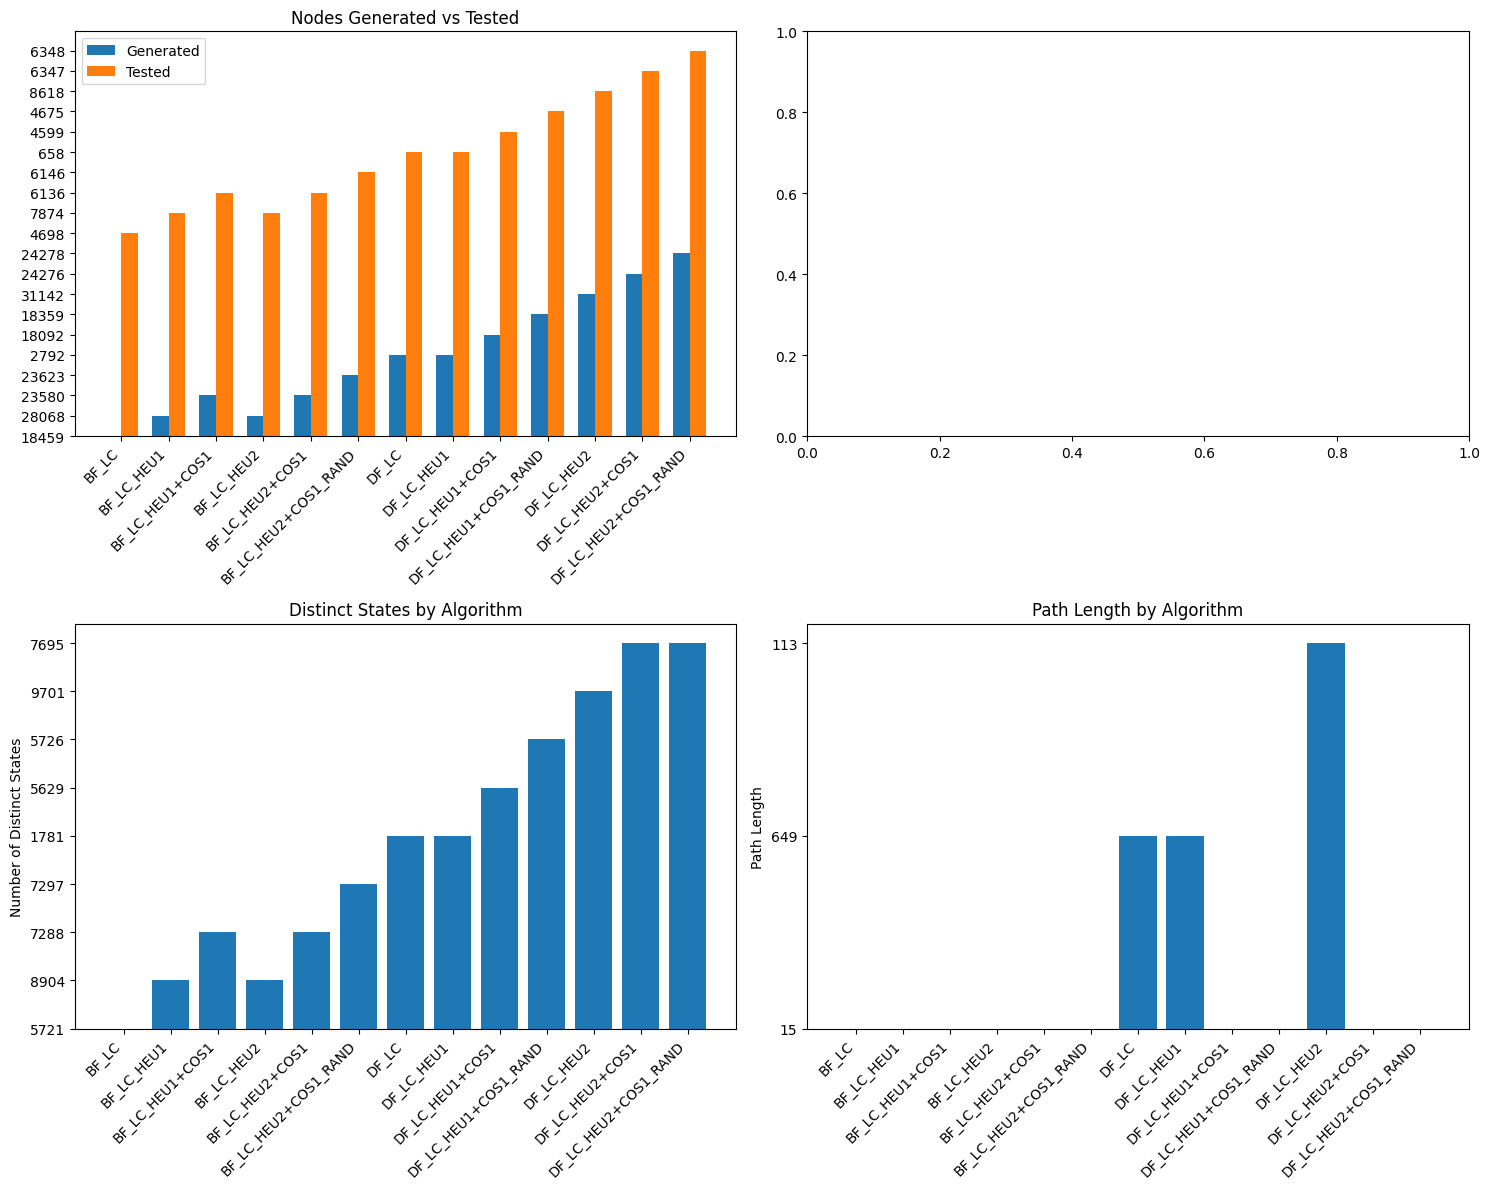

In [40]:
# Read data into DataFrame
data = TEST_PUZZLE_1_RESULTS

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Bar plot comparing nodes generated vs tested
successful = data[data['Term. Cond.'] == 'GOAL_STATE_FOUND']
x = np.arange(len(successful))
width = 0.35

ax1.bar(x - width/2, successful['Nodes Gen.'], width, label='Generated')
ax1.bar(x + width/2, successful['Nodes Tested'], width, label='Tested')
ax1.set_xticks(x)
ax1.set_xticklabels(successful['Name'], rotation=45, ha='right')
ax1.legend()
ax1.set_title('Nodes Generated vs Tested')

# 3. Bar plot of distinct states
ax3.bar(successful['Name'], successful['Distinct States'])
ax3.set_xticklabels(successful['Name'], rotation=45, ha='right')
ax3.set_ylabel('Number of Distinct States')
ax3.set_title('Distinct States by Algorithm')

# 4. Path length comparison
ax4.bar(successful['Name'], successful['Path Length'])
ax4.set_xticklabels(successful['Name'], rotation=45, ha='right')
ax4.set_ylabel('Path Length')
ax4.set_title('Path Length by Algorithm')
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (7,).

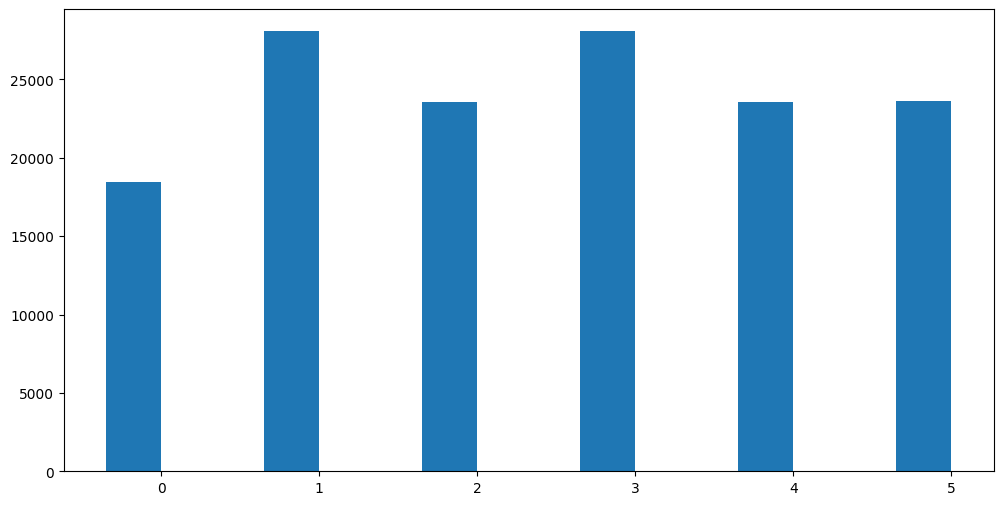

In [41]:

plt.figure(figsize=(12, 6))

data['Type'] = data['Name'].apply(lambda x: 'BF' if 'BF' in x else 'DF')

# Convert relevant columns to numeric
data['Nodes Gen.'] = pd.to_numeric(data['Nodes Gen.'])
data['Time Taken'] = pd.to_numeric(data['Time Taken'])

# Filter data for BF and DF
bf_data = data[data['Type'] == 'BF']
df_data = data[data['Type'] == 'DF']

# Create grouped bar chart
x = np.arange(len(bf_data))  # Number of BF entries
width = 0.35

plt.bar(x - width/2, bf_data['Nodes Gen.'], width, label='BF Nodes Generated')
plt.bar(x + width/2, df_data['Nodes Gen.'], width, label='DF Nodes Generated')

plt.xticks(x, bf_data['Name'], rotation=45, ha='right')
plt.ylabel('Number of Nodes')
plt.title('Breadth-First vs Depth-First Search Comparison')
plt.legend()

# Add time taken as line plot on secondary axis
ax2 = plt.twinx()
ax2.plot(x - width/2, bf_data['Time Taken'], 'r-o', label='BF Time')
ax2.plot(x + width/2, df_data['Time Taken'], 'g-o', label='DF Time')
ax2.set_ylabel('Time Taken (s)')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

C:\Users\lukew\AppData\Local\Temp\ipykernel_20916\3501418588.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


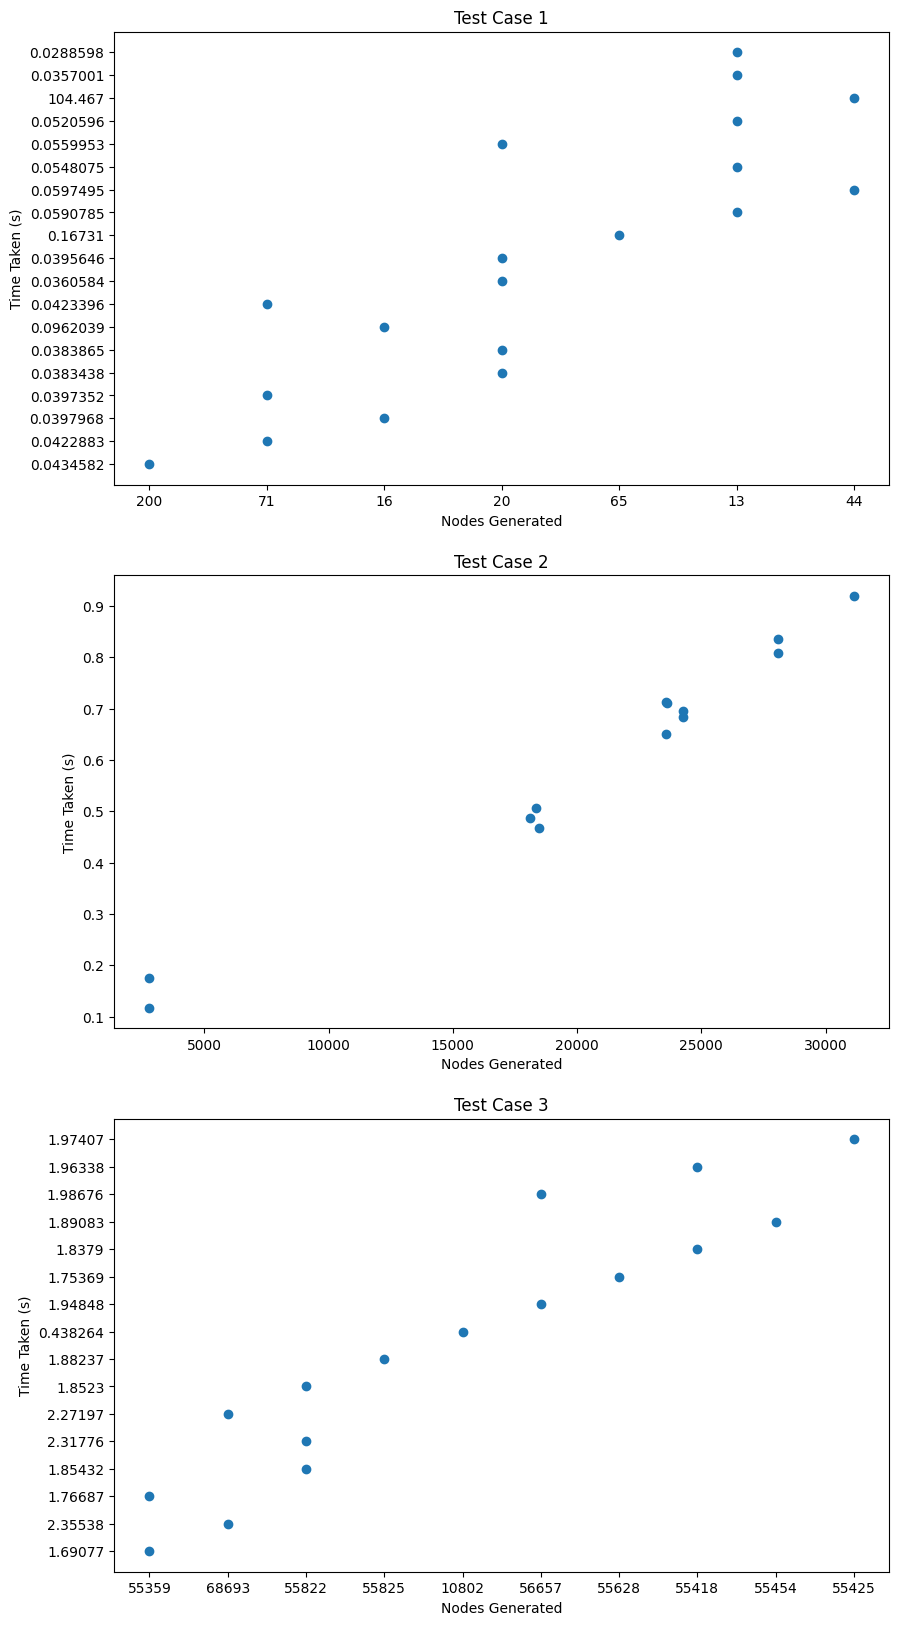

In [43]:
SUC_0 = TEST_PUZZLE_0_RESULTS
SUC_1 = TEST_PUZZLE_1_RESULTS[TEST_PUZZLE_1_RESULTS['Term. Cond.'] == 'GOAL_STATE_FOUND']
SUC_2 = TEST_PUZZLE_2_RESULTS[TEST_PUZZLE_2_RESULTS['Term. Cond.'] == 'GOAL_STATE_FOUND']

# 2. Scatter plot of time taken vs nodes generated
fig, ((ax1,ax2,ax3)) = plt.subplots(3, 1, figsize=(10, 20))

ax1.scatter(SUC_0['Nodes Gen.'], SUC_0['Time Taken'])
ax1.set_xlabel('Nodes Generated')
ax1.set_ylabel('Time Taken (s)')
ax1.set_title('Test Case 1')

ax2.scatter(SUC_1['Nodes Gen.'], SUC_1['Time Taken'])
ax2.set_xlabel('Nodes Generated')
ax2.set_ylabel('Time Taken (s)')
ax2.set_title('Test Case 2')

ax3.scatter(SUC_2['Nodes Gen.'], SUC_2['Time Taken'])
ax3.set_xlabel('Nodes Generated')
ax3.set_ylabel('Time Taken (s)')
ax3.set_title('Test Case 3')

fig.show()